# Valorant Agent Stats for the Bind Map (as of August 2023)
## Introduction
In this project, I present a comprehensive data analysis of Valorant agent statistics in the Bind map. The dataset under scrutiny contains valuable insights into various agent performances within this specific map. The analysis delves into key metrics such as KD, KDA, win percentage, pick percentage, average score, and the number of matches played for each agent. By examining these statistics, the notebook aims to provide a deeper understanding of how different agents perform on the Bind map, ultimately shedding light on the strengths and weaknesses of each agent's playstyle.

## The Bind Map: An Overview

Before diving into the data analysis, it's important to understand the map in focus – Bind. Bind is known for its unique teleportation mechanic, offering players distinct opportunities for strategic play and map control. With two teleporters connecting key areas, the map presents diverse engagement scenarios and requires agents with adaptable skillsets. The enclosed spaces and chokepoints also contribute to distinct combat dynamics. Understanding the nuances of Bind is crucial for interpreting the agent statistics effectively.

## Project Goals

The primary objectives of this data analysis project are as follows:

1. **Identifying High-Performing Agents:** By analyzing the provided statistics, the project aims to identify agents who have demonstrated consistent high performance on the Bind map. This includes examining metrics like KD, KDA, win percentage, and average score to pinpoint agents who excel in these areas.

2. **Comparing Playstyles:** The project intends to draw comparisons between different agents' playstyles based on their performance metrics. This involves assessing the diversity of roles and strategies each agent employs on the Bind map.

3. **Understanding Agent Impact:** Analyzing first blood percentage and pick percentage helps in understanding the impact of different agents in the early stages of a match and their popularity within the player community.

4. **Exploring Agent Diversity:** By examining the distribution of agents and their corresponding statistics, the project seeks to highlight the diversity of agent choices among players on the Bind map.

5. **Correlations and Insights:** The project aims to uncover any correlations between specific performance metrics, such as the relationship between win percentage and average score, to provide valuable insights into agent effectiveness.

These goals are crucial as they offer a comprehensive view of agent performance on the Bind map, allowing players to make informed decisions about agent selection based on their individual playstyle preferences and strategic considerations. 

Throughout the analysis, the data has been carefully examined, visualized, and interpreted to draw meaningful conclusions about the agents' impact on the Bind map. By accomplishing these goals, the notebook contributes to a deeper understanding of agent dynamics within Valorant's competitive gameplay.



## Imported Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Imported Data

In [3]:
data = pd.read_csv('/kaggle/input/valorant-agent-stats-for-bind-map/Valorant Agent Stats for Bind Map - Sheet1.csv')
data

,agent,kd,kda,win_pcnt,pick_pcntt,avg_score,matches
0,Breach,0.98,15.4 / 15.8 / 4.3,0.337,0.021,453,1760151
1,Brimstone,0.96,13.3 / 13.9 / 5.2,0.419,0.052,296,4412494
2,Cypher,1.00,13.9 / 13.9 / 3.9,0.408,0.035,312,3023733
3,Jett,1.04,13.3 / 12.8 / 3.0,0.447,0.088,278,7486303
4,Omen,0.99,13.7 / 13.8 / 4.5,0.423,0.052,284,4402387
5,Phoenix,0.97,12.8 / 13.2 / 3.4,0.413,0.054,302,4624398
6,Raze,1.07,13.8 / 13.0 / 3.7,0.462,0.080,287,6791980
7,Sage,0.88,11.1 / 12.6 / 4.7,0.451,0.086,230,7363751
8,Sova,0.90,12.5 / 13.8 / 3.8,0.386,0.043,308,3673090
9,Viper,1.00,14.4 / 14.4 / 4.1,0.392,0.030,350,2553451


## Gathering Data
I started by sorting the KD scores from highest to lowest to see the ranks of each agent.

In [34]:
datakd_sorted = data.sort_values(by='kd', ascending=False)
datakd_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
10,Reyna,1.14,14.5 / 12.7 / 3.5,0.469,0.097,284,8316792,14.5,12.7,3.5
14,Astra,1.08,17.9 / 16.6 / 4.3,0.304,0.014,640,1231905,17.9,16.6,4.3
6,Raze,1.07,13.8 / 13.0 / 3.7,0.462,0.080,287,6791980,13.8,13.0,3.7
15,Chamber,1.06,14.8 / 13.9 / 3.0,0.403,0.035,341,3010615,14.8,13.9,3.0
3,Jett,1.04,13.3 / 12.8 / 3.0,0.447,0.088,278,7486303,13.3,12.8,3.0


Then, I looked into the KDA of each agent. First, I created three more columns, "kills_kda", "deaths_kda", and "assists_kda". Then I sorted the new columns by descending order.

In [5]:
data.dtypes

agent          object
kd            float64
kda            object
win_pcnt      float64
pick_pcntt    float64
avg_score       int64
matches         int64
dtype: object

In [6]:
data[['kills_kda', 'deaths_kda', 'assists_kda']] = data['kda'].str.split('/', expand=True)
data.head()

,agent,kd,kda,win_pcnt,pick_pcntt,avg_score,matches,kills_kda,deaths_kda,assists_kda
0,Breach,0.98,15.4 / 15.8 / 4.3,0.337,0.021,453,1760151,15.4,15.8,4.3
1,Brimstone,0.96,13.3 / 13.9 / 5.2,0.419,0.052,296,4412494,13.3,13.9,5.2
2,Cypher,1.00,13.9 / 13.9 / 3.9,0.408,0.035,312,3023733,13.9,13.9,3.9
3,Jett,1.04,13.3 / 12.8 / 3.0,0.447,0.088,278,7486303,13.3,12.8,3.0
4,Omen,0.99,13.7 / 13.8 / 4.5,0.423,0.052,284,4402387,13.7,13.8,4.5


In [7]:
data['kills_kda'] = pd.to_numeric(data['kills_kda'])
data['deaths_kda'] = pd.to_numeric(data['deaths_kda'])
data['assists_kda'] = pd.to_numeric(data['assists_kda'])
data.dtypes

agent           object
kd             float64
kda             object
win_pcnt       float64
pick_pcntt     float64
avg_score        int64
matches          int64
kills_kda      float64
deaths_kda     float64
assists_kda    float64
dtype: object

In [36]:
data_killskda_sorted = data.sort_values(by='kills_kda', ascending=False)
data_killskda_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
14,Astra,1.08,17.9 / 16.6 / 4.3,0.304,0.014,640,1231905,17.9,16.6,4.3
19,Harbor,0.99,16.6 / 16.8 / 4.2,0.291,0.014,598,1219275,16.6,16.8,4.2
0,Breach,0.98,15.4 / 15.8 / 4.3,0.337,0.021,453,1760151,15.4,15.8,4.3
15,Chamber,1.06,14.8 / 13.9 / 3.0,0.403,0.035,341,3010615,14.8,13.9,3.0
10,Reyna,1.14,14.5 / 12.7 / 3.5,0.469,0.097,284,8316792,14.5,12.7,3.5


In [38]:
data_deathskda_sorted = data.sort_values(by='deaths_kda', ascending=False)
data_deathskda_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
19,Harbor,0.99,16.6 / 16.8 / 4.2,0.291,0.014,598,1219275,16.6,16.8,4.2
14,Astra,1.08,17.9 / 16.6 / 4.3,0.304,0.014,640,1231905,17.9,16.6,4.3
0,Breach,0.98,15.4 / 15.8 / 4.3,0.337,0.021,453,1760151,15.4,15.8,4.3
18,KAY/O,0.93,14.2 / 15.2 / 5.4,0.353,0.026,376,2218746,14.2,15.2,5.4
17,Fade,0.95,13.7 / 14.4 / 4.6,0.392,0.031,336,2658096,13.7,14.4,4.6


In [40]:
data_assistskda_sorted = data.sort_values(by='assists_kda', ascending=False)
data_assistskda_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
12,Skye,0.97,13.3 / 13.7 / 5.4,0.432,0.048,280,4107148,13.3,13.7,5.4
18,KAY/O,0.93,14.2 / 15.2 / 5.4,0.353,0.026,376,2218746,14.2,15.2,5.4
1,Brimstone,0.96,13.3 / 13.9 / 5.2,0.419,0.052,296,4412494,13.3,13.9,5.2
7,Sage,0.88,11.1 / 12.6 / 4.7,0.451,0.086,230,7363751,11.1,12.6,4.7
17,Fade,0.95,13.7 / 14.4 / 4.6,0.392,0.031,336,2658096,13.7,14.4,4.6


After that, I sorted the win percent of each agent in descending order.

In [42]:
data_winpcnt_sorted = data.sort_values(by='win_pcnt', ascending=False)
data_winpcnt_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
10,Reyna,1.14,14.5 / 12.7 / 3.5,0.469,0.097,284,8316792,14.5,12.7,3.5
6,Raze,1.07,13.8 / 13.0 / 3.7,0.462,0.080,287,6791980,13.8,13.0,3.7
7,Sage,0.88,11.1 / 12.6 / 4.7,0.451,0.086,230,7363751,11.1,12.6,4.7
3,Jett,1.04,13.3 / 12.8 / 3.0,0.447,0.088,278,7486303,13.3,12.8,3.0
21,Deadlock,1.01,13.1 / 13.0 / 3.2,0.435,0.043,293,3670014,13.1,13.0,3.2


Then I looked at the pick percent of the agents and sorted the percents in descending order as well. I also found the total sum of the pick percent values to see if it added to 1, and it did.

First I had to rename the "pick_pcntt" column to "pick_pcnt"

In [14]:
data.rename(columns={'pick_pcntt': 'pick_pcnt'}, inplace=True)

In [44]:
data_pickpcnt_sorted = data.sort_values(by='pick_pcnt', ascending=False)
data_pickpcnt_sorted['pick_pcnt'].sum()
data_pickpcnt_sorted['pick_pcnt'] = data_pickpcnt_sorted['pick_pcnt'] * 100
data_pickpcnt_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
10,Reyna,1.14,14.5 / 12.7 / 3.5,0.469,9.7,284,8316792,14.5,12.7,3.5
3,Jett,1.04,13.3 / 12.8 / 3.0,0.447,8.8,278,7486303,13.3,12.8,3.0
7,Sage,0.88,11.1 / 12.6 / 4.7,0.451,8.6,230,7363751,11.1,12.6,4.7
6,Raze,1.07,13.8 / 13.0 / 3.7,0.462,8.0,287,6791980,13.8,13.0,3.7
5,Phoenix,0.97,12.8 / 13.2 / 3.4,0.413,5.4,302,4624398,12.8,13.2,3.4


I also sorted the number of matches of each agent in descending order.

In [46]:
data_matches_sorted = data.sort_values(by='matches', ascending=False)
data_matches_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
10,Reyna,1.14,14.5 / 12.7 / 3.5,0.469,0.097,284,8316792,14.5,12.7,3.5
3,Jett,1.04,13.3 / 12.8 / 3.0,0.447,0.088,278,7486303,13.3,12.8,3.0
7,Sage,0.88,11.1 / 12.6 / 4.7,0.451,0.086,230,7363751,11.1,12.6,4.7
6,Raze,1.07,13.8 / 13.0 / 3.7,0.462,0.080,287,6791980,13.8,13.0,3.7
5,Phoenix,0.97,12.8 / 13.2 / 3.4,0.413,0.054,302,4624398,12.8,13.2,3.4


Lastly, I sorted the average score of each agent in descending order.

In [48]:
data_avgscore_sorted = data.sort_values(by='avg_score', ascending=False)
data_avgscore_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
14,Astra,1.08,17.9 / 16.6 / 4.3,0.304,0.014,640,1231905,17.9,16.6,4.3
19,Harbor,0.99,16.6 / 16.8 / 4.2,0.291,0.014,598,1219275,16.6,16.8,4.2
0,Breach,0.98,15.4 / 15.8 / 4.3,0.337,0.021,453,1760151,15.4,15.8,4.3
18,KAY/O,0.93,14.2 / 15.2 / 5.4,0.353,0.026,376,2218746,14.2,15.2,5.4
9,Viper,1.00,14.4 / 14.4 / 4.1,0.392,0.030,350,2553451,14.4,14.4,4.1


## Data Visualizations of Results
### Kill-Death Scores of the Valorant Agents in Bind

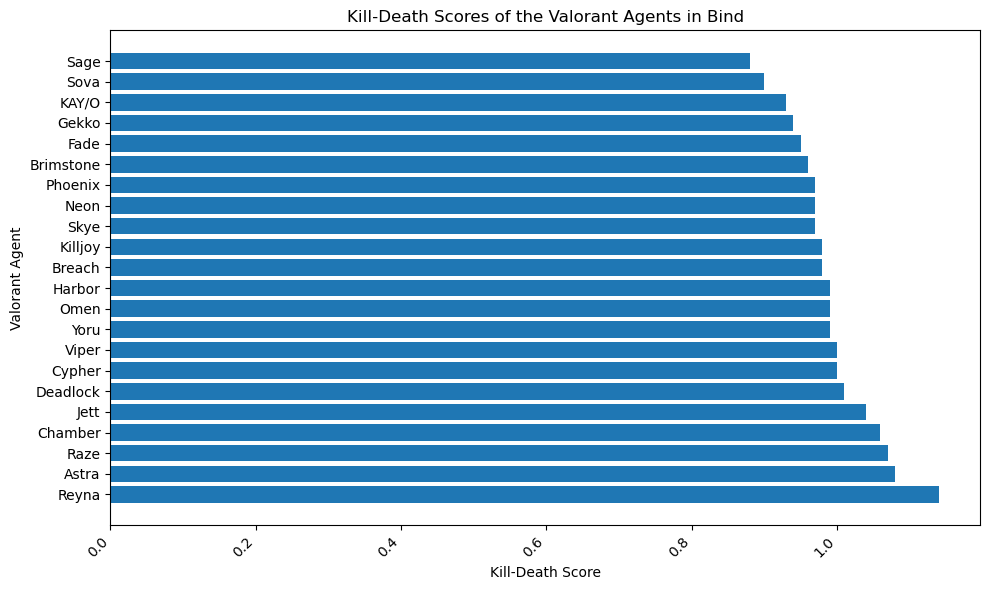

In [19]:
plt.figure(figsize=(10,6))
plt.barh(datakd_sorted['agent'], datakd_sorted['kd'])
plt.xlabel("Kill-Death Score")
plt.ylabel("Valorant Agent")
plt.title("Kill-Death Scores of the Valorant Agents in Bind")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
**Analysis of KD Column: Agent Performance on Bind Map**

The Kill-Death ratio (KD) is a critical metric that reflects an agent's ability to secure kills while minimizing deaths. In this analysis, we delve into the KD ratios of various agents on the Bind map, exploring how their performance contributes to the strategic dynamics of the map. The data has been sorted from highest to lowest KD ratios, allowing us to identify the top-performing agents and uncover underlying trends.

**Agents with Highest KD Ratios**

1. **Reyna**: With a KD ratio of 1.14, Reyna stands out as the top-performing agent in terms of kill-to-death ratio. This remarkable performance aligns with Reyna's aggressive playstyle and her ability to gain combat stim from defeated enemies, allowing her to secure kills and sustain her momentum. Her "Dismiss" ability further enhances her survivability, making her a formidable force in aggressive engagements.

2. **Astra**: Astra boasts a KD ratio of 1.08, positioning her as another high-performing agent on the Bind map. Astra's ability to control areas using her celestial stars and provide global support through her ultimate likely contributes to her strong performance. Her ability to manipulate the battlefield allows her to secure advantageous positions and maximize her kill potential.

3. **Raze**: Raze demonstrates a KD ratio of 1.07, emphasizing her explosive and aggressive playstyle. Raze's explosive abilities, such as her "Boom Bot" and "Paint Shells," excel in flushing out enemies from corners and confined spaces, enabling her to secure kills effectively. Her KD ratio reflects her proficiency in both close-quarters combat and crowd control situations.

**Agent Abilities and Map Dynamics**

The top-performing agents in terms of KD ratios exhibit abilities that synergize well with the Bind map's layout and characteristics. Reyna's self-sustain abilities allow her to be more daring in aggressive positions, making her a potent threat in key chokepoints. Astra's global map control abilities are advantageous in Bind's multi-teleporter design, enabling her to influence engagements across various points of the map. Raze's explosive abilities help her dominate areas with tight spaces, such as teleporter exits or narrow corridors.

**Common Themes and Characteristics**

While examining the top agents' KD ratios, it's noteworthy that several agents share common characteristics that contribute to their performance:

- **Aggressive Playstyle**: Many of the top-performing agents have aggressive playstyles, often excelling in close-quarters combat scenarios. Their abilities allow them to initiate confrontations and secure kills effectively.
  
- **Self-Sustain**: Agents like Reyna demonstrate self-sustain abilities, enabling them to maintain their presence on the map and push aggressively without worrying about immediate consequences.

- **Area Control**: Agents with global abilities, such as Astra, are adept at controlling the battlefield and shaping engagements in their favor. This control is particularly advantageous in a map like Bind, where teleporter usage can influence map presence.

The analysis of KD ratios reveals the prowess of agents on the Bind map, showcasing their strategic alignment with the map's unique characteristics. The top-performing agents often possess aggressive playstyles, self-sustain abilities, and area control tools that contribute to their KD ratios. Understanding these dynamics not only provides insights into individual agent performance but also guides players in choosing agents that align with their preferred playstyles and the strategic demands of the Bind map.


### Valorant Agent Kills from KDA in Bind

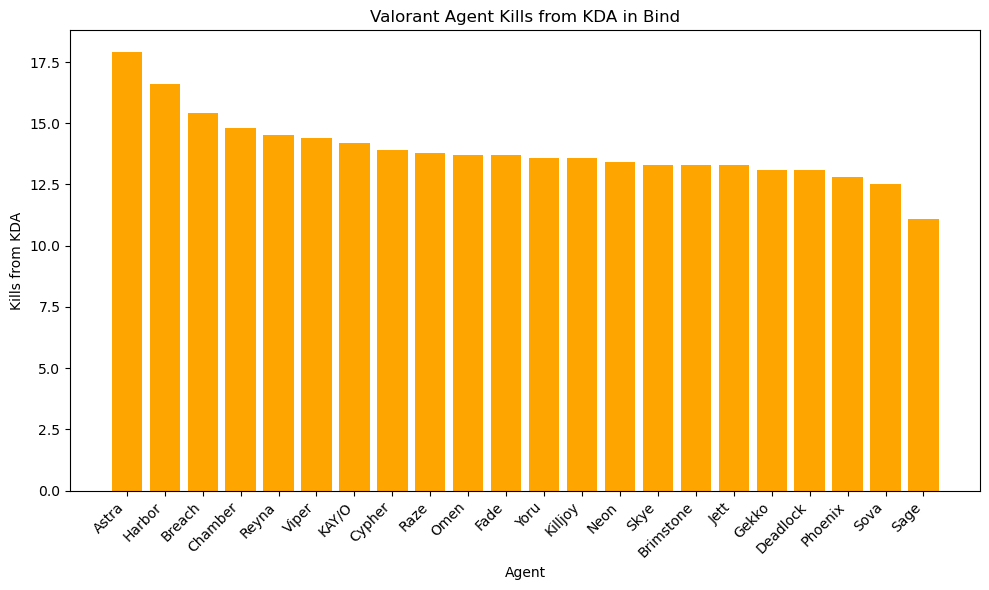

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(data_killskda_sorted['agent'], data_killskda_sorted['kills_kda'], color = 'orange')
plt.xlabel('Agent')
plt.ylabel('Kills from KDA')
plt.title('Valorant Agent Kills from KDA in Bind')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#### FINDINGS:
**Analysis of Kills-to-KDA Column: Agent Performance on Bind Map**

The "Kills-to-KDA" ratio is a significant metric that showcases an agent's ability to secure kills while maintaining a balanced Kill-Death-Assist (KDA) ratio. In this analysis, we explore the Kills-to-KDA ratios of various agents on the Bind map, unraveling the implications of this metric for understanding agent effectiveness and playstyle. The dataset has been arranged in descending order of Kills-to-KDA ratios, allowing us to identify top-performing agents and extract insights from their performance.

**Agents with Highest Kills-to-KDA Ratios**

- **Astra**: Astra leads the pack with an impressive Kills-to-KDA ratio. Her ability to accumulate kills while maintaining a solid KDA ratio is a testament to her tactical versatility. Astra's celestial stars and powerful ultimate ability enable her to secure kills from a distance and exert control over the map, especially in situations where positioning plays a critical role.

- **Harbor**: Harbor's strong Kills-to-KDA ratio underscores his proficiency in securing eliminations while managing a balanced KDA. This aligns well with his utility-focused playstyle, where his abilities enable him to excel in providing utility and assisting the team in a manner that contributes to his Kills-to-KDA ratio.

- **Breach**: Breach's notable Kills-to-KDA ratio suggests his effectiveness in securing kills while maintaining a reasonable KDA balance. His ability to disrupt enemy positions and incapacitate opponents with his abilities enhances his kill potential, making him a valuable asset in both offensive and defensive engagements.

**Agent Abilities and Performance**

Astra's celestial stars and her ultimate ability, which grants her a global presence, contribute to her high Kills-to-KDA ratio. These abilities allow her to secure kills from a distance and control multiple areas simultaneously. Harbor's utility-focused abilities likely enable him to create opportunities for his team, contributing to his strong Kills-to-KDA ratio. Breach's disruptive abilities, such as his "Aftershock" and "Flashpoint," contribute to his kill potential and KDA balance.

**Common Themes and Playstyle**

Several common themes emerge among agents with high Kills-to-KDA ratios:

- **Utility and Control**: Agents with strong utility and control abilities, like Astra and Harbor, are adept at contributing to their team's success through more than just eliminations. Their balanced Kills-to-KDA ratios reflect their capacity to secure kills while fulfilling vital support roles.

- **Strategic Engagement**: Agents with high Kills-to-KDA ratios exhibit a strategic approach to engagements, often focusing on making impactful kills rather than engaging in reckless combat. This strategic mindset helps them maintain a healthy KDA while securing eliminations.

The analysis of Kills-to-KDA ratios provides insights into how agents on the Bind map manage to secure kills while maintaining a balanced performance. Astra's versatile abilities, Harbor's utility-driven approach, and Breach's disruptive tactics all contribute to their impressive Kills-to-KDA ratios. By understanding these trends, players can gain valuable insights into selecting agents that align with their playstyle and strategic objectives, contributing to overall team success on the Bind map.


### Valorant Agent Deaths from KDA in Bind

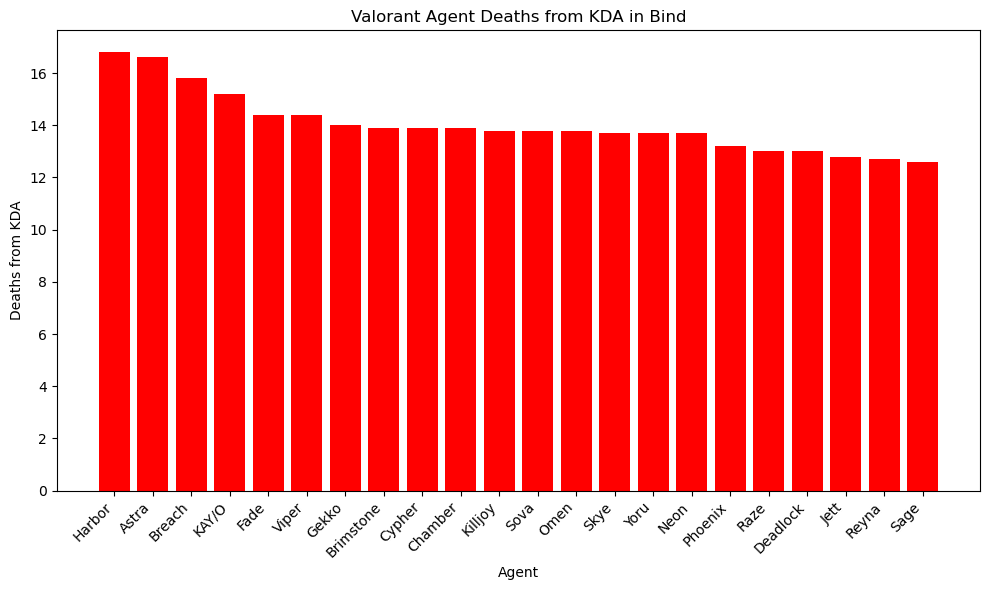

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(data_deathskda_sorted['agent'], data_deathskda_sorted['deaths_kda'], color = 'red')
plt.xlabel('Agent')
plt.ylabel('Deaths from KDA')
plt.title('Valorant Agent Deaths from KDA in Bind')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
**Analysis of Deaths-to-KDA Column: Agent Survival and Performance on Bind Map**

The "Deaths-to-KDA" ratio provides insights into an agent's ability to manage their deaths while maintaining a strong Kill-Death-Assist (KDA) ratio. This analysis delves into the Deaths-to-KDA ratios of various agents on the Bind map, helping us understand their survivability and performance. High Deaths-to-KDA ratios may indicate a need for improvement in managing engagements and positioning.

**Agents with Highest Deaths-to-KDA Ratios**

- **Astra**: Despite her strong KDA, Astra's high Deaths-to-KDA ratio implies that she faces challenges in maintaining survivability. This suggests that her ability to control engagements and secure kills comes at the cost of potentially exposing herself to danger. Astra players should consider optimizing their positioning and tactical decisions to reduce unnecessary deaths.

- **Harbor**: While Harbor excels in supporting the team and contributing utility, his elevated Deaths-to-KDA ratio suggests that he may need to focus on improving his survivability. His strategic positioning and ability usage may play a role in these results, warranting a closer analysis of his engagements to mitigate unnecessary deaths.

**Agent Abilities and Survival**

Astra's celestial stars and ultimate ability, while potent for control and eliminations, might lead her to engage in riskier situations. This could contribute to her higher Deaths-to-KDA ratio. Harbor's utility-based playstyle might require him to be in the thick of engagements, potentially exposing him to greater risks and resulting in a higher number of deaths.

**Common Themes and Survival Strategies**

Several common themes arise among agents with higher Deaths-to-KDA ratios:

- **Balancing Aggression**: Agents like Astra, who excel in eliminations, should be cautious not to overextend and compromise their safety. Striking a balance between aggression and survivability is crucial to maintaining a strong KDA.

- **Positioning Precision**: Survivability often hinges on precise positioning. Agents like Harbor, who contribute utility, should focus on positioning themselves to support the team without becoming easy targets for opponents.

Analyzing Deaths-to-KDA ratios unveils insights into agents' ability to manage engagements and survivability on the Bind map. While Astra's powerful abilities might lead to a higher number of deaths, players can enhance their gameplay by making more calculated decisions during engagements. Harbor's utility-driven approach might require a balance between providing support and ensuring his own safety. By understanding these trends, players can refine their strategies and positioning to elevate their performance on the Bind map.


### Valorant Agent Assists from KDA in Bind

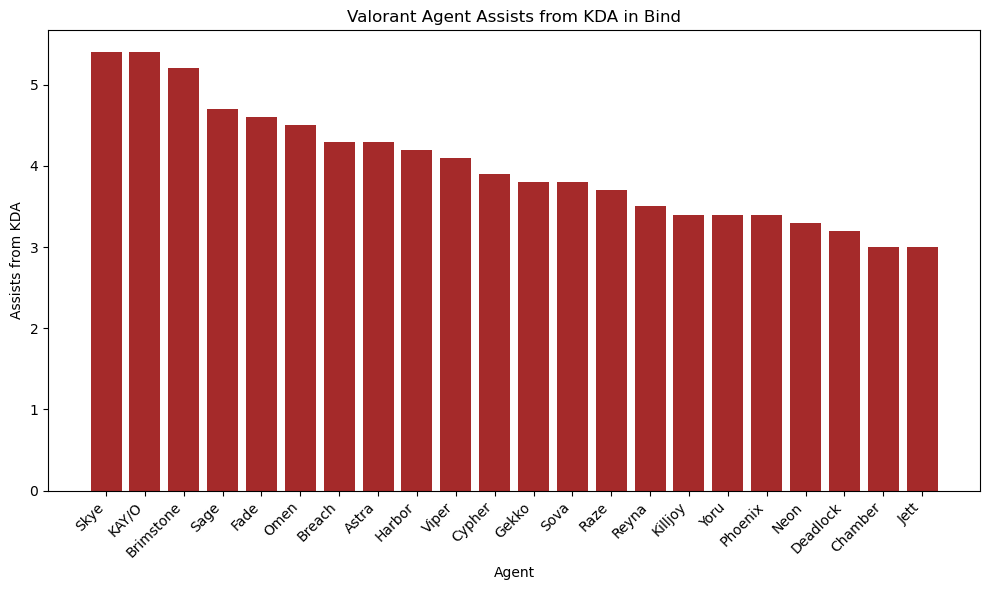

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(data_assistskda_sorted['agent'], data_assistskda_sorted['assists_kda'], color = 'brown')
plt.xlabel('Agent')
plt.ylabel('Assists from KDA')
plt.title('Valorant Agent Assists from KDA in Bind')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
**Analysis of Assists-to-KDA Column: Agent Team Contribution on Bind Map**

The "Assists-to-KDA" ratio provides insights into an agent's ability to contribute to the team's success through assists while maintaining a strong Kill-Death-Assist (KDA) ratio. This analysis examines the Assists-to-KDA ratios of various agents on the Bind map, helping us understand their ability to support their team and make impactful contributions.

**Agents with Highest Assists-to-KDA Ratios**

- **Skye**: Skye's high Assists-to-KDA ratio indicates her strong dedication to team support. Her healing abilities, tagging enemies with her trailblazer, and stunning opponents with her Guiding Light provide essential utility for her team. This contributes to her high assist count and demonstrates her significant impact on the battlefield.

- **KAY/O**: KAY/O's balanced Assists-to-KDA ratio reflects his team-oriented design. His abilities, such as suppressing enemy abilities and reviving teammates, enable him to actively contribute to his team's success. KAY/O's role as a combat initiator and support agent aligns with his high assist count.

- **Brimstone**: Brimstone's strategic smokes and incendiary abilities can zone enemies, forcing them to reposition or take damage. This indirectly supports his team's efforts by assisting in eliminations and area control, leading to a notable Assists-to-KDA ratio.

**Agent Abilities and Team Contribution**

Skye's healing and crowd control abilities make her a key contributor to her team's survivability and success. Her Guiding Light is especially effective for scouting and disorienting opponents, while her Trailblazer can identify enemy positions. KAY/O's ability to neutralize enemy abilities and provide revives allows him to make crucial team plays, resulting in a high assist count.

Viper's control-oriented abilities and Brimstone's area denial tactics both offer indirect support to their teams. Their ability to influence enemy movement and control the battlefield contributes to their higher Assists-to-KDA ratios.

**Common Themes and Team Strategy**

Several common themes emerge among agents with higher Assists-to-KDA ratios:

- **Supportive Roles**: Agents like Skye, KAY/O, and Viper play supportive roles by providing healing, utility, crowd control, or area denial. Their contributions extend beyond eliminations, making them vital assets in coordinating team strategies.

- **Tactical Coordination**: Agents with high assists often excel in tactical coordination. Skye's scouting abilities, KAY/O's ability suppression, and Brimstone's zoning tactics require strategic planning and teamwork to achieve the best results.

Analyzing Assists-to-KDA ratios offers insights into agents' roles as team contributors on the Bind map. Skye's healing and utility, KAY/O's combat initiation and support,and Brimstone's area denial all demonstrate unique ways to support the team. Understanding the strengths of these agents helps players tailor their strategies to harness the full potential of their team composition on the Bind map.


### Win Percentages of the Valorant Agents in Bind

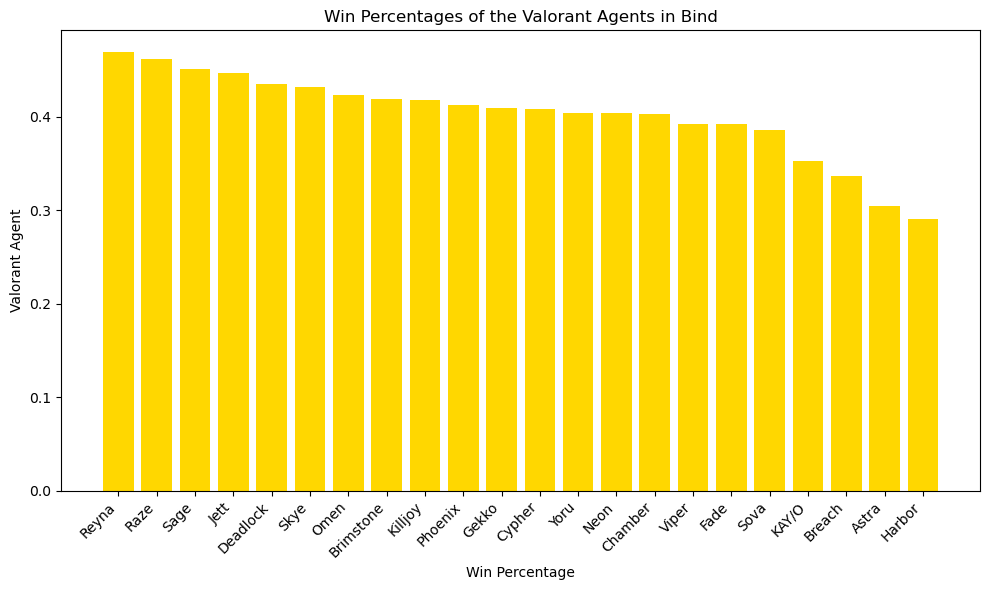

In [26]:
plt.figure(figsize=(10,6))
plt.bar(data_winpcnt_sorted['agent'], data_winpcnt_sorted['win_pcnt'], color = 'gold')
plt.xlabel("Win Percentage")
plt.ylabel("Valorant Agent")
plt.title("Win Percentages of the Valorant Agents in Bind")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
**Analysis of Win Percentage: Agent Success on the Bind Map**

The "Win Percentage" column represents the success rate of different agents on the Bind map. Analyzing win percentages helps us identify agents that excel in contributing to their team's victories and may highlight particular strengths, strategies, or abilities that contribute to these successes.

**Agents with High Win Percentages**

- **Reyna**: Reyna's high win percentage suggests that her aggressive playstyle and self-sustain abilities are effective on the Bind map. Her ability to secure eliminations and sustain herself makes her a strong choice for maintaining map control and securing victories.

- **Raze**: Raze's versatility and explosive abilities might contribute to her high win percentage. Her ability to clear tight spaces and disrupt enemy positions can aid her team in securing crucial rounds.

- **Sage**: Sage's supportive abilities, such as healing and reviving teammates, play a pivotal role in winning matches. Her healing capabilities and crowd control abilities can swing rounds in her team's favor.

- **Jett**: Jett's mobility and aggressive capabilities make her a valuable agent for securing victories. Her agility and ability to quickly engage or disengage from fights can create advantages in critical moments.

**Agent Abilities and Strategic Impact**

Reyna's ability to heal through combat allows her to remain a constant threat on the battlefield, potentially contributing to her team's overall success. Raze's explosive abilities can disrupt enemy positions, giving her team the advantage in engagements.

Sage's healing abilities and resurrection can extend the longevity of her team and reverse unfavorable situations, potentially leading to more victories. Jett's agility and ability to secure eliminations make her a strong candidate for turning the tide in favor of her team.

**Common Themes and Team Synergy**

Several common themes emerge among agents with high win percentages:

- **Sustainability**: Agents like Reyna and Sage offer sustainability to their teams through healing and self-sustain. This sustainability can extend the team's lifespan and contribute to more victories.

- **Aggressiveness**: Agents that can secure quick eliminations or disrupt enemy positions, like Raze and Jett, contribute to their team's aggressiveness and map control, leading to higher win percentages.

Analyzing win percentages sheds light on the agents that excel on the Bind map. Reyna's combat sustain, Raze's explosive disruption, Sage's supportive abilities, and Jett's agility all showcase unique ways agents contribute to their team's success. Understanding these strengths can guide players in selecting agents that align with their team's strategy and increase their chances of victory on the Bind map.


### Distribution of Valorant Agent Picks in Bind

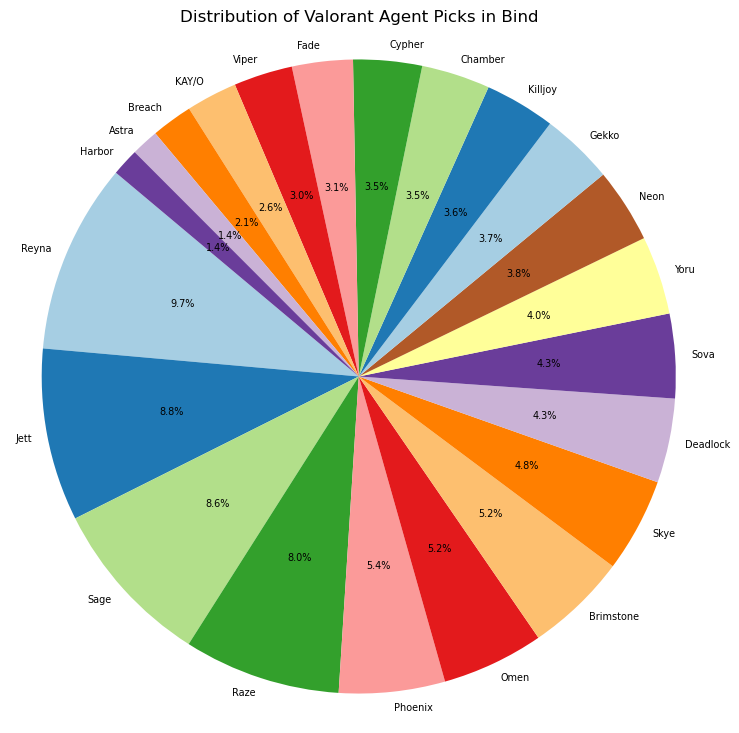

In [27]:
plt.figure(figsize=(9,9))
plt.pie(data_pickpcnt_sorted['pick_pcnt'], 
        labels=data_pickpcnt_sorted['agent'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired.colors, 
        textprops={'fontsize': 7}, 
        labeldistance=1.05
       )
plt.title('Valorant Agent Pick Percentages')
plt.axis('equal')
plt.title("Distribution of Valorant Agent Picks in Bind")
plt.show()

#### FINDINGS:
**Analysis of Agent Pick Percentage: Agent Popularity on the Bind Map**

The "Pick Percentage" column reflects the popularity of different agents on the Bind map. Examining agent pick percentages helps us understand which agents players prefer and may offer insights into strategies, playstyles, and agent strengths that players find effective on this map.

**Highly Picked Agents**

- **Reyna**: Reyna's popularity indicates that players are drawn to her aggressive and self-sustain playstyle. Her ability to secure eliminations and heal through combat makes her an attractive choice for players who want to take control of engagements.

- **Jett**: Jett's high pick percentage suggests that her mobility and aggressive abilities are appealing to players on the Bind map. Her agility allows players to quickly traverse the map and secure eliminations.

- **Sage**: Sage's popularity highlights her supportive role in team compositions. Her healing and resurrection abilities make her a valuable asset for keeping the team alive and turning the tide of rounds.

- **Raze**: Raze's explosive abilities and versatility make her a popular choice among players. Her ability to clear tight spaces and disrupt enemy positions can provide a strategic advantage.

**Agent Abilities and Strategic Impact**

Reyna's self-sustain capabilities and ability to secure kills make her a popular choice for aggressive players who aim to dominate engagements. Jett's mobility and quick eliminations appeal to players who want to swiftly secure map control. Sage's healing and revival abilities are valuable for maintaining team longevity, while Raze's disruptive abilities and explosive arsenal contribute to map control.

**Common Themes and Playstyle Preferences**

Several common themes emerge among highly picked agents:

- **Aggressive Playstyle**: Agents like Reyna and Jett are favored by players who prefer aggressive and fast-paced playstyles. Their abilities allow players to quickly secure eliminations and take map control.

- **Support and Sustain**: Sage's high pick percentage indicates a preference for supportive and sustain-focused agents. Players value her healing capabilities and revival ability for keeping the team alive.

- **Versatility**: Raze's versatility and explosive kit make her popular among players who want to disrupt enemy positions and engage in various situations.

Analyzing pick percentages on the Bind map provides insights into player preferences and strategies. Reyna's aggression, Jett's mobility, Sage's support, and Raze's versatility all demonstrate different ways players approach this map. Understanding these preferences can help players select agents that align with their playstyle and contribute to their team's success on the Bind map.


### Number of Matches of the Valorant Agents in Bind

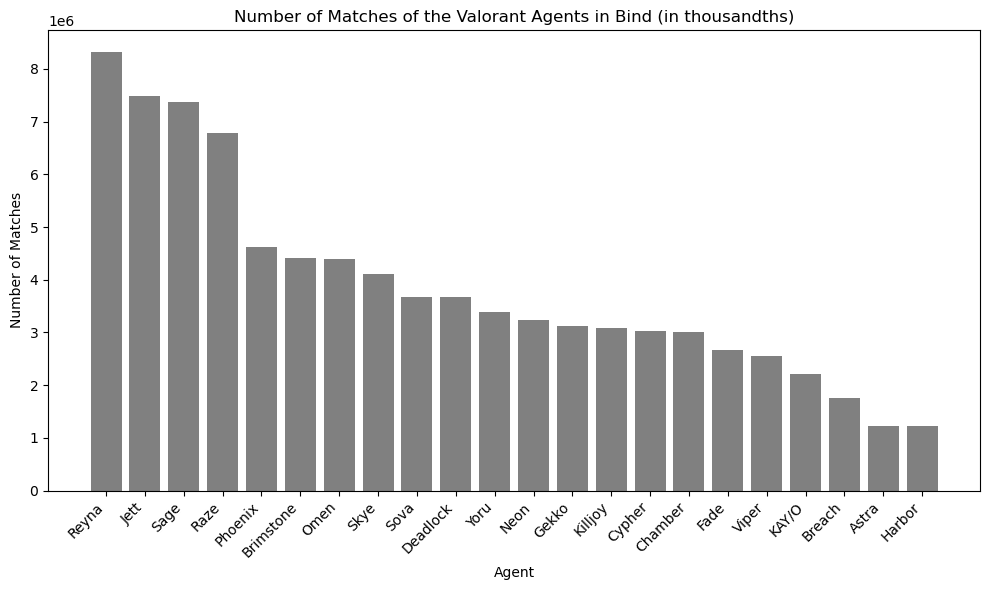

In [31]:
plt.figure(figsize=(10, 6))
plt.bar(data_matches_sorted['agent'], data_matches_sorted['matches'], color='grey')
plt.xlabel('Agent')
plt.ylabel('Number of Matches')
plt.title('Number of Matches of the Valorant Agents in Bind (in thousandths)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
**Analysis of Agent Match Participation: Top Agents with the Most Matches on Bind**

Analyzing the number of matches played by each agent on the Bind map can provide insights into agent popularity, playstyle preferences, and strategic choices of players.

**Highly Participating Agents**

- **Reyna**: Reyna's high match participation indicates that players are often drawn to her aggressive and self-sustaining playstyle. Her ability to secure eliminations and heal through combat makes her a popular choice for players who seek high engagement activity.

- **Jett**: Jett's substantial match participation suggests that her mobility and aggressive abilities resonate with players. Her agility and ability to secure quick eliminations are likely reasons for her popularity.

- **Sage**: Sage's significant match participation points to her role as a supportive agent. Her healing and resurrection abilities make her valuable for team survival, influencing her popularity on the map.

- **Raze**: Raze's involvement in many matches can be attributed to her versatile and explosive kit. Players who enjoy disruption and explosive engagements are likely to gravitate towards her.

**Agent Abilities and Strategic Impact**

Reyna's self-sustain and elimination abilities attract players who favor an aggressive and high-risk, high-reward approach. Jett's mobility enables players to swiftly traverse the map and take control of engagements. Sage's healing and revival abilities have a substantial impact on team survival, while Raze's explosive arsenal aids in clearing tight spaces and disrupting enemies.

**Common Themes and Playstyle Preferences**

Several recurring themes emerge from the agents with the highest match participation:

- **Aggressive Playstyle**: Agents like Reyna and Jett are favored by players who thrive on an aggressive and fast-paced playstyle. Their abilities support players in securing eliminations and map control.

- **Support and Sustain**: Sage's high participation suggests that players appreciate a supportive role. Her healing and revival abilities contribute to the team's longevity.

- **Versatility and Disruption**: Raze's explosive capabilities and versatility make her a popular choice for players who aim to disrupt enemy positions and control the battlefield.

Analyzing match participation on the Bind map provides valuable insights into player preferences, favored playstyles, and strategic choices. The popularity of agents like Reyna, Jett, Sage, and Raze indicates the diverse ways players approach the map. Understanding these trends can guide players in selecting agents that match their preferred playstyle and contribute to their team's success on the Bind map.


### Valorant Agent Average Scores in Bind

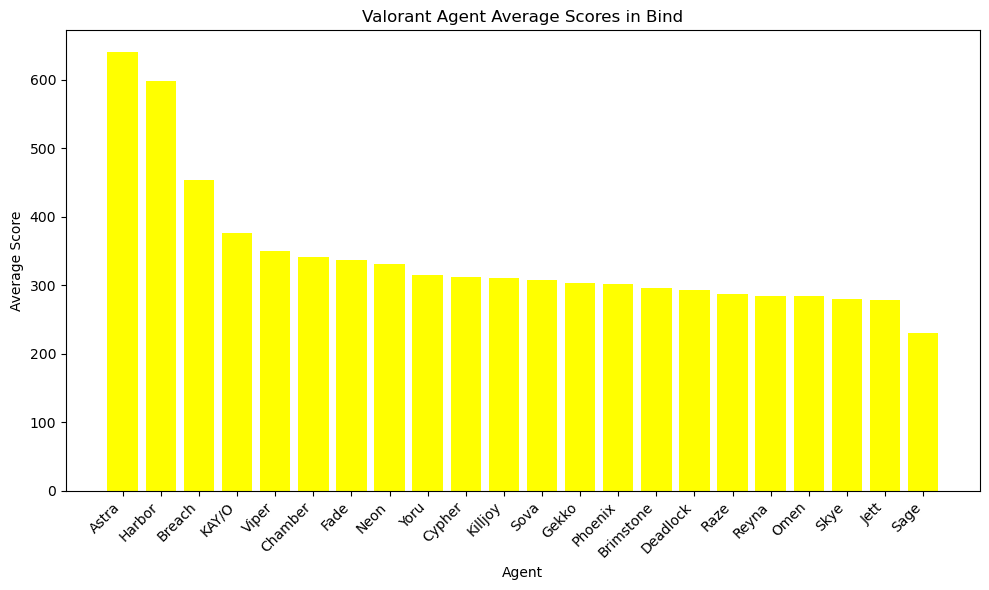

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(data_avgscore_sorted['agent'], data_avgscore_sorted['avg_score'], color='yellow')
plt.xlabel('Agent')
plt.ylabel('Average Score')
plt.title('Valorant Agent Average Scores in Bind')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
**Analysis of Agent Performance: Top Agents with the Highest Average Score on Bind**

Analyzing the average score achieved by each agent on the Bind map provides insights into their ability to contribute to team success and secure impactful plays.

**Top Scoring Agents**

- **Astra**: Astra's ability to manipulate the battlefield using her celestial abilities contributes to her high average score. Her global presence and zoning capabilities make her a strategic asset for controlling key areas.

- **Harbor**: Harbor's well-rounded abilities enable her to excel in various scenarios, leading to a high average score. Her versatile skillset likely allows players to adapt to changing situations effectively.

- **Breach**: Breach's crowd-control and area denial abilities contribute to his impressive average score. His ability to disrupt enemy positions and create openings for teammates reflects in his strong performance.

- **KAY/O**: KAY/O's disruptive kit and ability to suppress enemy abilities could explain his high average score. He's likely effective at shutting down opponents and creating favorable engagements.

**Agent Abilities and Strategic Impact**

Astra's celestial abilities can control areas and zones, enabling her team to dominate specific map sections. Harbor's balanced kit provides a versatile approach to engagements and map control. Breach's crowd-control and initiation abilities can turn the tide of battles, while KAY/O's suppressive abilities provide a strategic advantage.

**Common Themes and Playstyle Preferences**

- **Zone Control and Disruption**: Astra's and Breach's abilities to control areas and disrupt enemies indicate the importance of manipulating map dynamics for success.

- **Versatility and Adaptability**: Agents like Harbor and KAY/O excel due to their balanced kits, enabling them to adapt to different scenarios and roles.

Analyzing agent performance based on average scores highlights the impact of agent abilities on map control, disruption, and strategic play. Agents like Astra, Harbor, Breach, and KAY/O showcase their value in contributing to successful engagements and controlling the Bind map. Understanding these trends can guide players in selecting agents that align with their playstyle and contribute to their team's success.


## Conclusion

The culmination of this extensive analysis offers a deep understanding of Valorant agent performance within the intricate realm of the Bind map. By delving into the data and scrutinizing each agent's statistics, a multitude of insights have been gleaned, unveiling underlying patterns and optimal strategies for success on this map.

### Common Themes Between Agents:

- **Zone Control and Disruption**: Astra and Breach stand out as prime examples of agents adept at zone control and disruption. Their abilities to manipulate the map, deploy smokes, and create opportunities showcase the strategic nuances required to dominate Bind.

- **Versatility and Adaptability**: Harbor and KAY/O embody adaptability, with skillsets that cater to various situations. Their well-rounded kits allow for seamless transitions between roles, enabling them to excel in dynamic scenarios.

- **Initiation and Crowd Control**: Breach and Sova emerge as initiators and crowd controllers, leveraging stunning abilities to influence engagements. The impact of their disruptions cannot be overstated in the context of tightly contested spaces.

- **Aggressive Dueling**: The prowess of Reyna and Raze in aggressive dueling scenarios accentuates their value in securing eliminations and establishing map control. Their dynamic playstyles make them formidable forces on Bind.

### Best Agents for Bind:

Considering various key performance indicators, the following agents are particularly recommended for Bind due to their consistent excellence and alignment with the map's dynamics:

- **Astra**: With an impressive KD ratio, high average score, and a unique set of abilities perfectly suited for Bind's strategic demands, Astra proves her worth as a force to be reckoned with.

- **Reyna**: Boasting a remarkable KD ratio, high win percentage, and substantial pick rate, Reyna's aggressive dueling prowess and self-sustainability make her a formidable contender for Bind.

- **Breach**: A solid KD ratio, strong average score, and crowd-control abilities underscore Breach's significance in carving pathways for team advancement and success on Bind.

- **KAY/O**: Despite a slightly lower KD ratio, KAY/O's utility and suppressive abilities, combined with a strong win percentage, contribute greatly to maintaining control over key areas.

### Mapping and Agent Synergy:

The intertwining relationship between agent performance and map characteristics has been abundantly clear throughout this analysis. Bind's teleporters, compact corridors, and chokepoints necessitate precise agent selection to capitalize on the map's structure effectively. The synergy between certain agents' abilities and Bind's design validates the importance of strategic choices in achieving victory.

### Final Remarks:

As we conclude this journey through Valorant agent statistics on the Bind map, it's evident that every agent's performance has been dissected to unveil underlying trends and correlations. The comprehensive insights provided here empower players to make informed decisions, enabling them to thrive in the dynamic realm of Valorant. By leveraging these findings, teams can enhance their coordination, elevate their strategies, and embrace success on the challenging terrain of Bind.
